In [4]:
import numpy as np
import pandas as pd           # for data cleaning
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df=pd.read_csv('mymoviedb.csv',lineterminator='\n')
df

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
2442,2004-04-13,13 Going on 30,After total humiliation at her thirteenth birt...,35.313,4165,6.7,en,"Comedy, Fantasy, Romance",https://image.tmdb.org/t/p/original/iNZdSIfhSC...
2443,2005-06-29,Fantastic Four,"During a space voyage, four scientists are alt...",35.313,7911,5.8,en,"Action, Adventure, Fantasy, Science Fiction",https://image.tmdb.org/t/p/original/8HLQLILZLh...
2444,2020-10-29,A Gruta,The only one survivor of a mysterious murderer...,35.280,65,6.4,pt,Horror,https://image.tmdb.org/t/p/original/nBdoS8tjWu...
2445,1994-07-01,Baby's Day Out,Baby Bink couldn't ask for more; he has adorin...,35.276,996,6.2,en,"Family, Comedy, Adventure, Crime",https://image.tmdb.org/t/p/original/21U2jwl36h...


In [7]:
df.shape

(2447, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2447 entries, 0 to 2446
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       2447 non-null   object 
 1   Title              2447 non-null   object 
 2   Overview           2447 non-null   object 
 3   Popularity         2447 non-null   float64
 4   Vote_Count         2447 non-null   int64  
 5   Vote_Average       2447 non-null   float64
 6   Original_Language  2447 non-null   object 
 7   Genre              2447 non-null   object 
 8   Poster_Url         2447 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 172.2+ KB


In [18]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [19]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2442    False
2443    False
2444    False
2445    False
2446    False
Length: 2447, dtype: bool

In [21]:
df.duplicated().sum()

0

In [22]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,2447.000000,2447.000000,2447.000000
mean,101.913947,3146.480180,6.625868
std,206.080884,4313.779159,1.102282
min,35.266000,0.000000,0.000000
25%,43.347500,227.000000,6.100000
50%,57.705000,1298.000000,6.700000
75%,92.618000,4559.000000,7.300000
max,5083.954000,31077.000000,9.100000


#### release date column should have date as datatype  (object means string)
#### you can remove columns like overview, poster, language as they are not asked in question paper.
#### You have to remove even the white spaces between the genre values
#### all comes down under data preprocessing

In [ ]:
• Exploration Summary
• we have a dataframe consisting of 9827 rows and 9 columns.
• our dataset looks a bit tidy with no NaNs nor duplicated values.
• Release_Date column needs to be casted into date time and to extract only the year values
• Overview, Original_Languege and Poster-Url wouldn't be so useful during analysis, so we will drop them
• there is noticable outliers in Popularity column
• Vote_Average bettter be categorised for proper analysis.
• Genre column has comma saperated values and white spaces that needs to be handled and casted into category. Exploration summary

In [24]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


## data cleaning

In [30]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [31]:
# .dt is a pandas accessor used to extract datetime components (like year, month, day, hour) from a datetime series (i.e., a column with datetime values).
df['Release_Date']=df['Release_Date'].dt.year
print(df['Release_Date'].dtypes)

int32


#### dropping the columns

In [34]:
cols=['Overview','Original_Language','Poster_Url']

In [36]:
df.drop(cols,axis=1,inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

#### <b>categorizing Vote_average column
#### We would cut the Vote_average values and make 4 categories: popular average below_avg, not_popular to describe it more using categorize_col function provided above

In [39]:
def categorize_col(df, col, labels):
    edges= [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]        #pd.cut() is used to split a continuous numerical column into discrete bins (categories).
    df[col]=pd.cut(df[col],edges, labels=labels,duplicates='drop')
    return df

In [40]:
labels=['not_popular','below_avg','average','popular']
categorize_col(df,'Vote_Average',labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
2442,2004,13 Going on 30,35.313,4165,below_avg,"Comedy, Fantasy, Romance"
2443,2005,Fantastic Four,35.313,7911,not_popular,"Action, Adventure, Fantasy, Science Fiction"
2444,2020,A Gruta,35.280,65,below_avg,Horror
2445,1994,Baby's Day Out,35.276,996,below_avg,"Family, Comedy, Adventure, Crime"


In [41]:
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [42]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [43]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    622
below_avg      621
average        601
popular        581
Name: count, dtype: int64

In [44]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [45]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


###  we'd split genres into a list and then explode our dataframe to have only one genre per row for each movie

In [48]:
df['Genre']=df['Genre'].str.split(', ')
df=df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [49]:
# casting column into category
df['Genre']=df['Genre'].astype('category')
df['Genre'].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6713 entries, 0 to 6712
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  6713 non-null   int32   
 1   Title         6713 non-null   object  
 2   Popularity    6713 non-null   float64 
 3   Vote_Count    6713 non-null   int64   
 4   Vote_Average  6713 non-null   category
 5   Genre         6713 non-null   category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 197.7+ KB


In [51]:
df.nunique()

Release_Date      74
Title           2378
Popularity      2379
Vote_Count      1835
Vote_Average       4
Genre             19
dtype: int64

In [52]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


# Data Visualisation (most important)

In [ ]:
sns.set_style('whitegrid')

In [78]:
# tip: always give answer by visualisation

# Q1: What is the most frequent genre in the dataset?

In [54]:
df['Genre'].describe()

count       6713
unique        19
top       Action
freq         857
Name: Genre, dtype: object

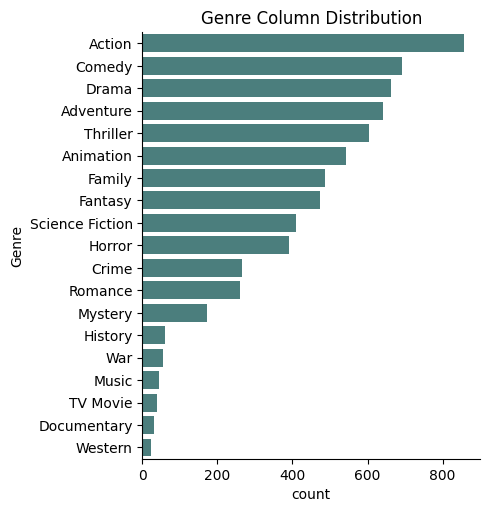

In [55]:
sns.catplot(y='Genre', data=df, kind='count',order=df['Genre'].value_counts().index,color='#428785')
plt.title('Genre Column Distribution')
plt.show()

# Q2: What has highest votes in vote_average column?

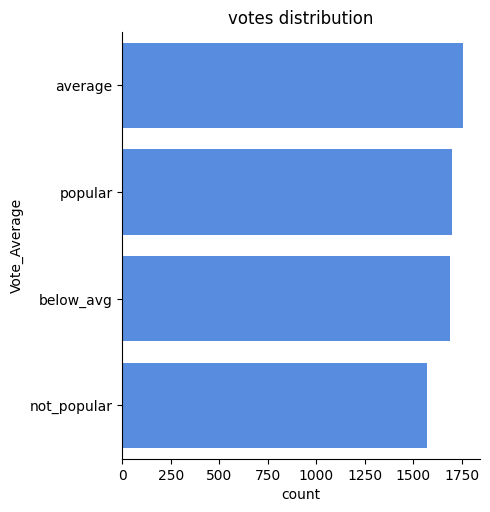

In [57]:
 # visualizing vote_average column
sns.catplot(y = 'Vote_Average', data = df, kind = 'count', order = df['Vote_Average'].value_counts().index, color = '#4287f5')
plt.title('votes distribution')
plt.show()

In [83]:
# df['Vote_Average'].max()

'popular'

In [87]:
# 1. Filter rows where vote_average is 'popular'
# popular_df = df[df['Vote_Average'] == 'popular']
# print(popular_df)

# 2. Count how many times each genre appears
# top_genre = popular_df['Genre'].value_counts().idxmax()
# top_genre

# Q3: What movie got the highest popularity and what is its genre ?

In [62]:
# checking max popularity in dataset
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


# Q4: What movie got the lowest popularity? what's its genre?

In [63]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
6709,1991,An American Tail: Fievel Goes West,35.266,588,below_avg,Adventure
6710,1991,An American Tail: Fievel Goes West,35.266,588,below_avg,Animation
6711,1991,An American Tail: Fievel Goes West,35.266,588,below_avg,Family
6712,1991,An American Tail: Fievel Goes West,35.266,588,below_avg,Western


# Q5: Which year has the most filmmed movies?

<Axes: >

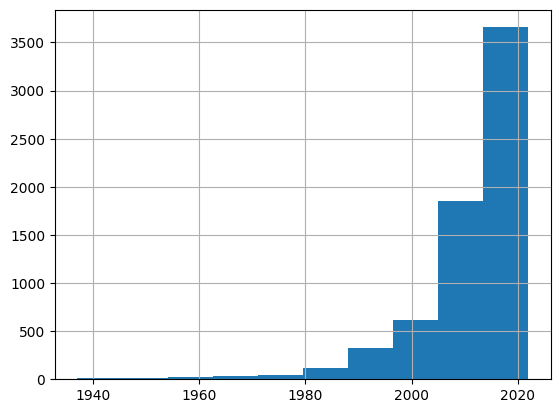

In [77]:
df['Release_Date'].hist()
# plt.plot('Release_Date column distribution')
# plt.show()

In [ ]:
# Tip: Always provide a summary at end 

In [ ]:
conclusion

Q1: What is the most frequent genre in the dataset?
Action genre is the most frequent genre in our dataset.
    
Q2: What has highest votes in vote_average column ?
The highest category in the vote_average column is "popular". Drama again gets the highest popularity among fans.

Q3: What movie got the highest popularity ? what's its genre ?
Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Adventure and Science Fiction .

Q4: What movie got the lowest popularity ? what's its genre ?
The An American Tail: Fievel Goes West has the highest lowest rate in our dataset and it has genres of adventure, animation, family and Western`.

Q5: Which year has the most filmmed movies?
year 2020 has the highest filmming rate in our dataset